---
# COM4402 INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: HABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [5]:
#IMPORTAMOS LAS LIBERIAS.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [7]:
#VISUALIZAMOS LAS PRIMERAS FILAS DEL DATAFRAME.

print("VISUALIZACIÓN DE FILAS INICIALES")
display(df.head())

VISUALIZACIÓN DE FILAS INICIALES


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [8]:
# VISUALIZAMOS LAS COLUMNAS Y FILAS TOTALES

print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 2499
Cantidad de columnas: 13


In [9]:
# VERIFICAR EXISTENCIA DE VALORES NULOS

df.isnull().sum().any()

False

In [10]:
#VISUALIZAMOS UNA DESCRIPCIÓN DE LOS DATOS.

print("REALIZAMOS UNA VISUALIZACION DE LAS DESCRIPCIONES")
display(df.describe())

REALIZAMOS UNA VISUALIZACION DE LAS DESCRIPCIONES


,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [11]:
#VISUALIZAMOS LOS TIPOS DE DATOS DEL DATAFRAME.

print("VISUALIZAMOS LOS TIPOS DE DATOS DE LAS COLUMNAS")
print(df.dtypes)

VISUALIZAMOS LOS TIPOS DE DATOS DE LAS COLUMNAS
Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object


In [12]:
# CHECKEAMOS CANTIDAD DE VALORES ÚNICOS POR CADA ATRIBUTO
for column in df.select_dtypes(include='object').columns:
    print(f'{column}: {df[column].nunique()} valores únicos')

brand: 28 valores únicos
model: 127 valores únicos
title_status: 2 valores únicos
color: 49 valores únicos
vin: 2495 valores únicos
state: 44 valores únicos
country: 2 valores únicos
condition: 47 valores únicos


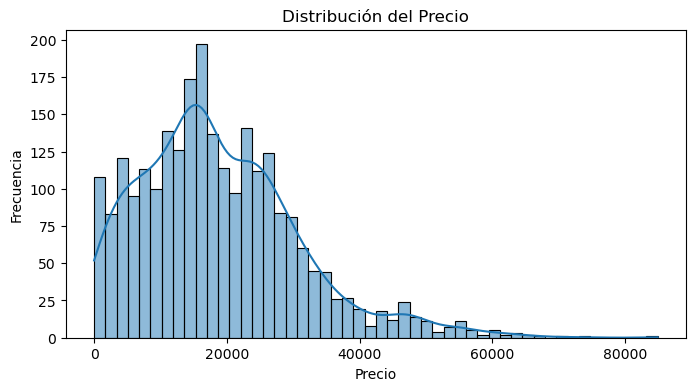

In [13]:
# HISTOGRTAMA DE LA DISTRIBUCIÓN DE PRECIOS.

plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución del Precio")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

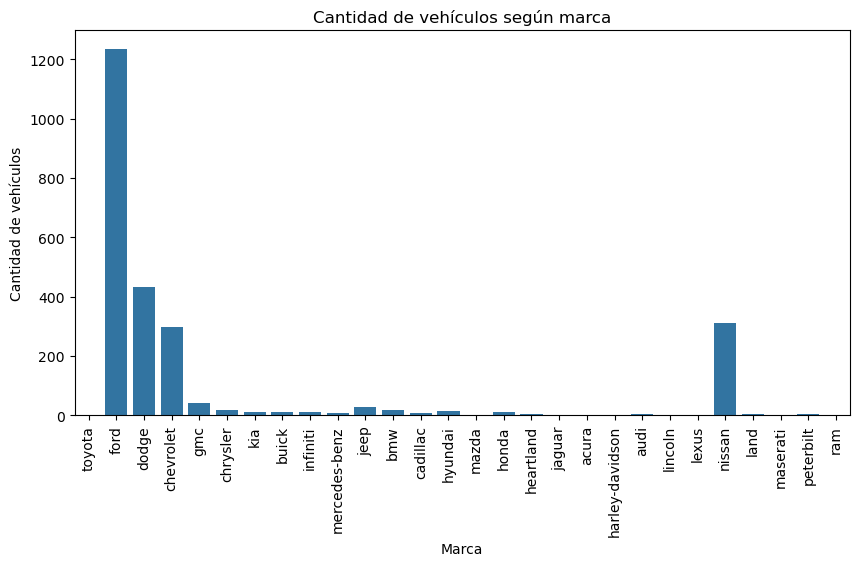

In [14]:
# GRAFICAMOS LA CANTIDAD DE VEHÍCULOS SEGÚN LA MARCA

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand')
plt.xlabel('Marca')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show()

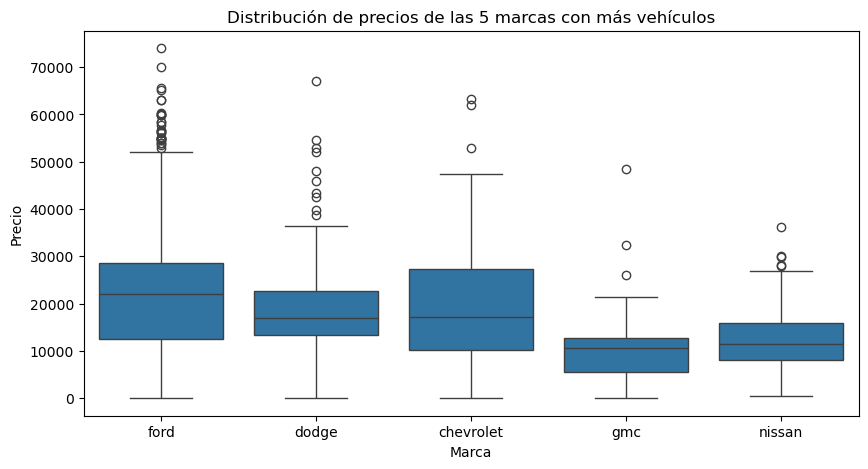

In [15]:
# GRAFICAMOS LA DISTRIBUCIÓN DE PRECIOS DE LAS 5 MARCAS CON MÁS VEHÍCULOS.

top_brands = df['brand'].value_counts().nlargest(5).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Distribución de precios de las 5 marcas con más vehículos')
plt.show()

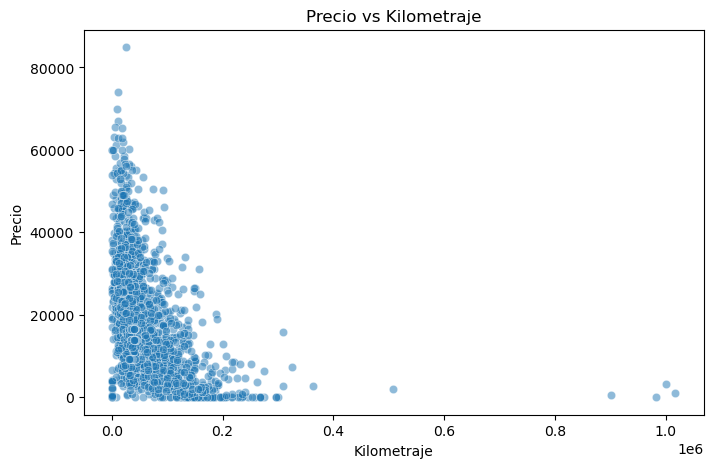

In [16]:
# SCATTERPLOT DE LA RELACIÓN PRECIO CON KILOMETRAJE

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title("Precio vs Kilometraje")
plt.xlabel("Kilometraje")
plt.ylabel("Precio")
plt.show()

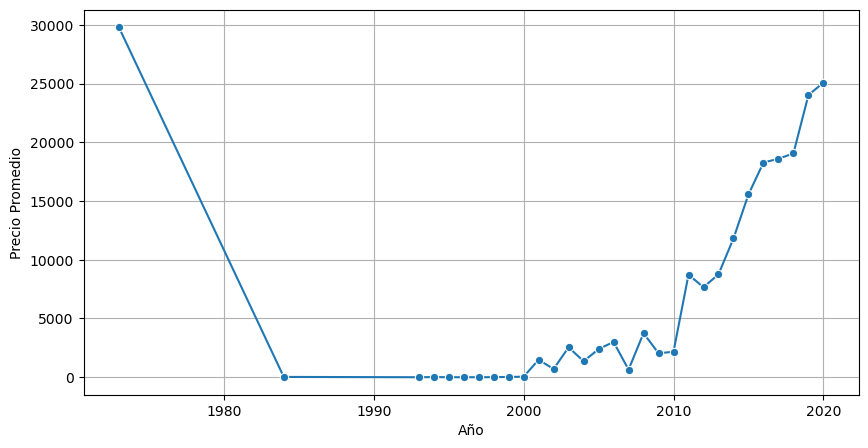

In [17]:
# GRAFICAMOS EL PRECIO PROMEDIO A LO LARGO DE LOS AÑOS.

price_by_year = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=price_by_year, x='year', y='price', marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y REDUCCIÓN DE DIMENSIONALIDAD
---

In [18]:
#ELIMINAMOS COLUMNAS.

df.drop(columns=['vin', 'lot', 'Unnamed: 0'], inplace=True, errors='ignore')

In [19]:
# REVISAMOS SI LA ELIMINICACIÓN DE COLUMNAS SE REALIZO.

print("ELIMINACIÓN DE COLUMNAS")
df.head()

ELIMINACIÓN DE COLUMNAS


,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [20]:
# APLICAMOS UNA CODIFICACIÓN DE VARIABLES CON LABELENCONDER.

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print(f"CODIFICAMOS LAS COLUMNAS {list(cat_cols)}")

CODIFICAMOS LAS COLUMNAS ['brand', 'model', 'title_status', 'color', 'state', 'country', 'condition']


In [21]:
# SEPARAMOS LAS VARIABLES DE PREDICCIÓN CON LA OBJETIVO.

X = df.drop(columns=['price'])
y = df['price']

In [22]:
# REALIZAMOS LA SEPARACION DE ENTRENAMIENTO Y TEST.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("SEPARACIÓN DEL DATAFRAME EN ENTRENAMIENTO Y TEST")

SEPARACIÓN DEL DATAFRAME EN ENTRENAMIENTO Y TEST


In [23]:
# APLICAMOS UN ESCALAMIENTO DE UNIDADES EN LAS VARIABLES NUMERICAS.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("IGUALAMOS LAS VARIABLES EN LA MISMA UNIDAD DE MEDIDA")

IGUALAMOS LAS VARIABLES EN LA MISMA UNIDAD DE MEDIDA


---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

In [24]:
#  CREAMOS UN DICCIONARIO DE RESULTADOS.

# CREAMOS UN DICCIONARIO DE RESULTADOS
resultados = {
    "Modelo": [],
    "MSE": [],
    "MAE": [],
    "R²": []
}

# CREAMOS UN DICCIONARIO PARA LOS ERRORES
errores_modelos = {}

In [25]:
# APLICAMOS LOS MODELOS DE REGRESIÓN LINEAL, RANDOMFOREST REGRESSOR Y KNN REGRESSOR.

modelos = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

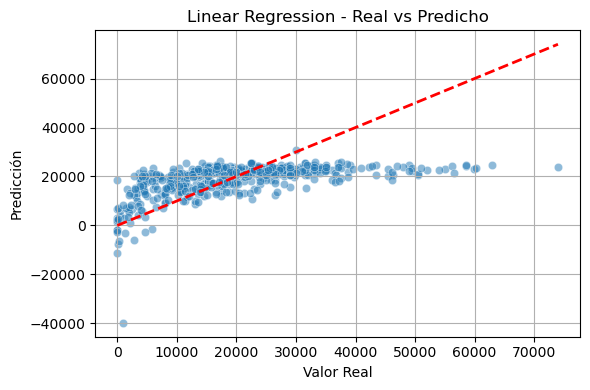

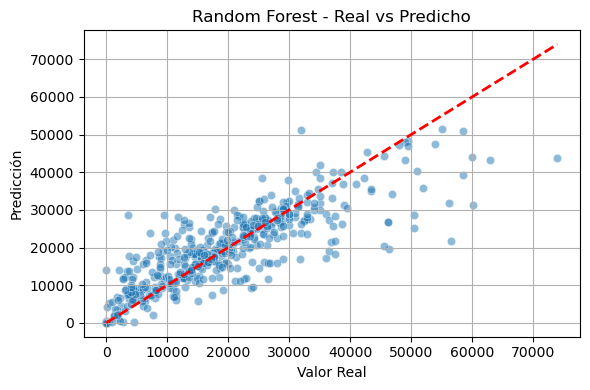

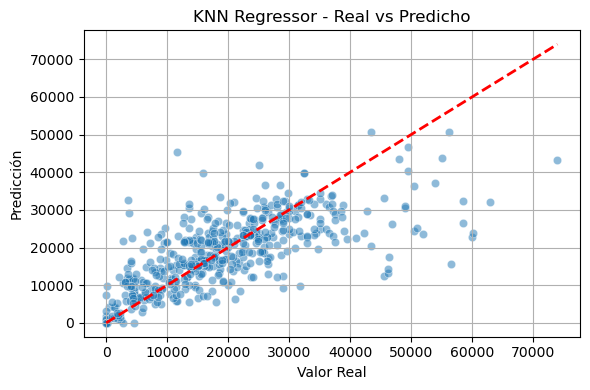

In [26]:
# REALIZAMOS ENTRENAMIENTO, PREDICCIÓN Y EVALUACIÓN. 

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

# APLICAMOS METRICAS DE MSE, MAE Y R2.
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

# GUARDAMOS LOS RESULTADOS DE LAS METRICAS.
    resultados["Modelo"].append(nombre)
    resultados["MSE"].append(mse)
    resultados["MAE"].append(mae)
    resultados["R²"].append(r2)

# REGISTRAMOS LOS ERRORES.

    errores_modelos[nombre] = y_test - y_pred

# CREAMOS LOS LOS GRAFICOS PARA ANALIZAR LOS 3 MODELOS. 

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{nombre} - Real vs Predicho")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [27]:
# CREAMOS UN DATAFRAME CON LOS RESULTADOS OBTENIDOS.

df_resultados = pd.DataFrame(resultados)

# VISUALIZAMOS LAS METRICAS.
print("METRICAS DE COMPARACIÓN:")
display(df_resultados)

METRICAS DE COMPARACIÓN:


,Modelo,MSE,MAE,R²
0,Linear Regression,1.112437e+08,7762.597411,0.298116
1,Random Forest,4.816013e+07,4538.564800,0.696137
2,KNN Regressor,8.066933e+07,6004.673600,0.491023


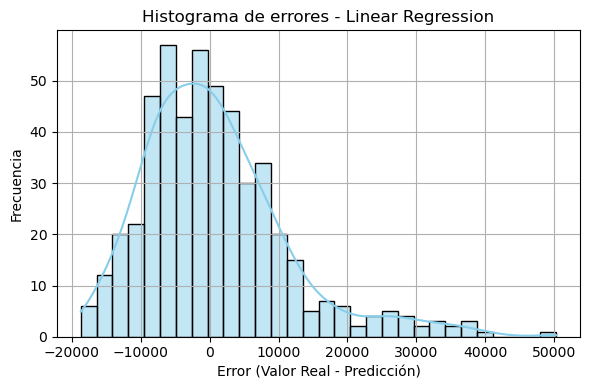

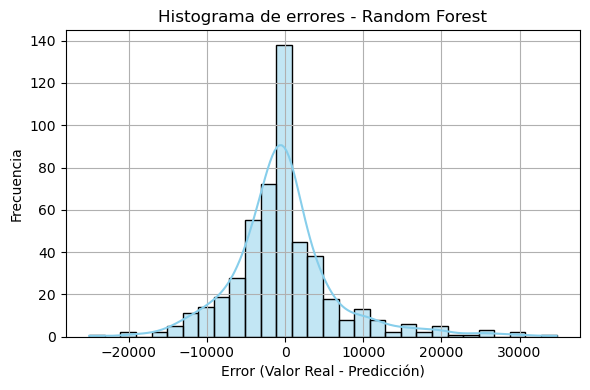

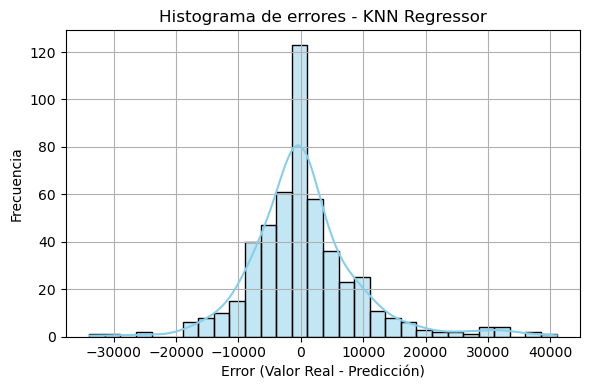

In [28]:
# GRAFICAMOS HISTOGRAMAS DE ERRORES PARA CADA MODELO

for nombre, errores in errores_modelos.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(errores, bins=30, kde=True, color="skyblue")
    plt.title(f"Histograma de errores - {nombre}")
    plt.xlabel("Error (Valor Real - Predicción)")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---